#                                       Market segmentation analysis

##  1.  Deciding (not) to Segment

McDonald’s can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald’s can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.

----

## 2. Specifying the Ideal Target Segment

McDonald's management needs to decide which key features make a market attractive to them. These include homogeneous, distinct, large enough to justify a customised marketing mix, open to eating at fast food restaurants, identifiable, reachable, and positive perception of McDonald's. To solidify their position in market segments, they may want to learn more about market segments which are not fond of McDonald's and attempt to modify those perceptions.

## 3. Collecting Data

The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald's with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. For each of those attributes, respondents provided either a YES or NO response. Additionally, respondents indicated their age and gender. Had this data been collected for a real market segmentation study, additional information would have been collected to enable the development of a richer and more detailed description of each market segment.

----

## 4.Exploring Data


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dframe = pd.read_csv('mcdonalds.csv')

In [21]:
dframe.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [22]:
list[dframe.columns]

list[Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')]

In [23]:
dframe.shape

(1453, 15)

In [24]:
dframe.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [25]:
data = dframe[dframe.columns[0:11]]

In [26]:
dataModified = data.replace(to_replace = ['Yes','No'],value = [1,0])

In [27]:
round(dataModified.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components = 11)
X = dataModified
principleComponents = pca.fit_transform(X)
dframe2 = pd.DataFrame(data = principleComponents,columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11'])


In [30]:
#StandardDeviation
round(dframe2.describe().loc['std'],4)

PC1     0.7570
PC2     0.6075
PC3     0.5046
PC4     0.3988
PC5     0.3374
PC6     0.3103
PC7     0.2897
PC8     0.2751
PC9     0.2653
PC10    0.2488
PC11    0.2369
Name: std, dtype: float64

In [31]:
#Proportion of Variance
varianceProportion = pca.explained_variance_ratio_
dframe3 = pd.DataFrame(columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11'],data = varianceProportion.reshape(1,11) )


In [32]:
dframe3.index = ['Proportion of Variance']

In [33]:
dframe3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.0503,0.043849,0.039548,0.036761,0.032353,0.029323


In [34]:
#Cumulative Proportion
cumulativeProportion  = np.cumsum(varianceProportion)
dframe4 = pd.DataFrame(columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9','PC10', 'PC11'],data = cumulativeProportion.reshape(1,11) )


In [35]:
dframe4.index = ['Cumulative Proportion']

In [36]:
dframe4

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Cumulative Proportion,0.299447,0.492244,0.62529,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.0


## 5 . Data Structure Analysis


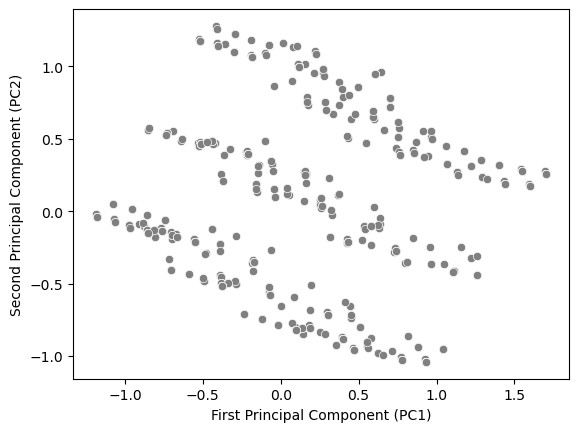

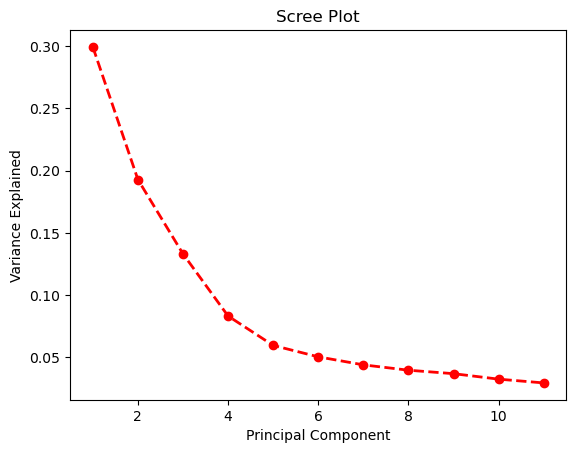

In [66]:
pcaResult = pca.transform(dataModified)
sns.scatterplot(x = pcaResult[:, 0],y = pcaResult[:, 1],color = 'grey')
plt.xlabel("First Principal Component (PC1)")
plt.ylabel("Second Principal Component (PC2)")
plt.show()


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o--', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

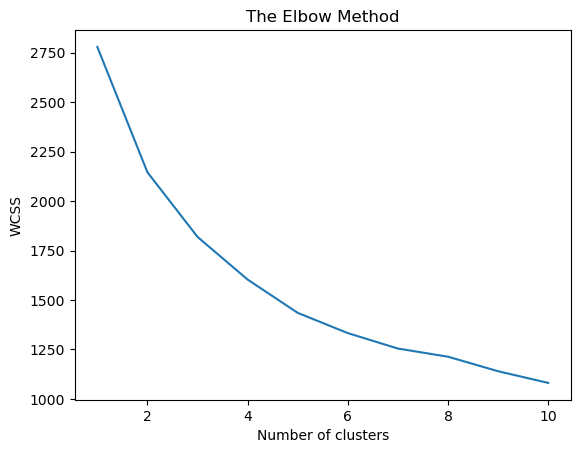

In [67]:
X=dataModified
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()